<a href="https://colab.research.google.com/github/Lucas01iveira/metroclima-IC/blob/main/IAG_25_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd 
import glob 
import seaborn as sns
import matplotlib.pyplot as plt

## Primeiros passos

In [49]:
# Construo o data frame do CRDS isotópico na semana do dia 25 (25/10 - 29/10)
df_25 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2201-i/iag-g2201-i-2020_CFIDS2278-20211025-DataLog_User_df.dat', # Leio o dataframe
                 usecols=['DATE_TIME','12CO2_dry'], # pego somente as colunas de interesse
                 index_col='DATE_TIME') # defino a coluna DATE_TIME como index

df_25.rename(columns={'12CO2_dry':'CO2_dry'}, inplace=True) # Altero o nome da coluna de co2 (por conveniência)
df_25.index = pd.to_datetime(df_25.index) # defino o índice como um elemento "date/time"
df_25 = df_25[df_25['CO2_dry'] > 390] # filtro as medidas dos cilindros (que são utilizados apenas para calibração)
df_25 = df_25.resample('H').mean() # corrijo as médias horárias 
df_25 = df_25.iloc[df_25.index.day == 25] # excluo o dado da 00:00 do dia seguinte

# _________________________________________________________________________________________________________________________________
df_26 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2201-i/iag-g2201-i-2020_CFIDS2278-20211026-DataLog_User_df.dat',
                 usecols=['DATE_TIME','12CO2_dry'],
                 index_col='DATE_TIME')

df_26.rename(columns={'12CO2_dry':'CO2_dry'}, inplace=True)
df_26.index = pd.to_datetime(df_26.index)
df_26 = df_26[df_26['CO2_dry'] > 390]
df_26 = df_26.resample('H').mean()
df_26 = df_26.iloc[df_26.index.day == 26]

# _________________________________________________________________________________________________________________________________
df_27 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2201-i/iag-g2201-i-2020_CFIDS2278-20211027-DataLog_User_df.dat',
                 usecols=['DATE_TIME','12CO2_dry'],
                 index_col='DATE_TIME')

df_27.rename(columns={'12CO2_dry':'CO2_dry'}, inplace=True)
df_27.index = pd.to_datetime(df_27.index)
df_27 = df_27[df_27['CO2_dry'] > 390]
df_27 = df_27.resample('H').mean()
df_27 = df_27.iloc[df_27.index.day == 27]

# _________________________________________________________________________________________________________________________________
df_28 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2201-i/iag-g2201-i-2020_CFIDS2278-20211028-DataLog_User_df.dat',
                 usecols=['DATE_TIME','12CO2_dry'],
                 index_col='DATE_TIME')

df_28.rename(columns={'12CO2_dry':'CO2_dry'}, inplace=True)
df_28.index = pd.to_datetime(df_28.index)
df_28 = df_28[df_28['CO2_dry'] > 390]
df_28 = df_28.resample('H').mean()
df_28 = df_28.iloc[df_28.index.day == 28]

# _________________________________________________________________________________________________________________________________
df_29 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2201-i/iag-g2201-i-2020_CFIDS2278-20211029-DataLog_User_df.dat',
                 usecols=['DATE_TIME','12CO2_dry'],
                 index_col='DATE_TIME')

df_29.rename(columns={'12CO2_dry':'CO2_dry'}, inplace=True)
df_29.index = pd.to_datetime(df_29.index)
df_29 = df_29[df_29['CO2_dry'] > 390]
df_29 = df_29.resample('H').mean()
df_29 = df_29.iloc[df_29.index.day == 29]

df_isotopico = pd.concat(
    [df_25, df_26, df_27, df_28, df_29]
)

df_isotopico = df_isotopico.reset_index(drop=True)
#df_isotopico

In [50]:
# Construo o data frame com os dados do crds (padrão)
dg_25 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2301/iag-g2301-2020_CFADS2502-20211025-DataLog_User_df.dat', # leio o dataframe
                 usecols=['DATE_TIME','CO2_dry'], # pego somente as colunas de interesse
                 index_col='DATE_TIME') # defino a coluna DATE_TIME como index

dg_25.index = pd.to_datetime(dg_25.index) # transformo o index num elemento "date/time"
dg_25 = dg_25[dg_25['CO2_dry'] > 405] # filtro as medidas dos cilindros de calibração
dg_25 = dg_25.resample('H').mean() # corrijo as médias horárias
dg_25 = dg_25.iloc[dg_25.index.day == 25] # excluo o dado da 00:00 do dia seguinte

# _________________________________________________________________________________________________________________________________
dg_26 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2301/iag-g2301-2020_CFADS2502-20211026-DataLog_User_df.dat',
                 usecols=['DATE_TIME','CO2_dry'],
                 index_col='DATE_TIME')

dg_26.index = pd.to_datetime(dg_26.index)
dg_26 = dg_26[dg_26['CO2_dry'] > 410]
dg_26 = dg_26.resample('H').mean()
dg_26 = dg_26.iloc[dg_26.index.day == 26]

# _________________________________________________________________________________________________________________________________
dg_27 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2301/iag-g2301-2020_CFADS2502-20211027-DataLog_User_df.dat',
                 usecols=['DATE_TIME','CO2_dry'],
                 index_col='DATE_TIME')

dg_27.index = pd.to_datetime(dg_27.index)
dg_27 = dg_27[dg_27['CO2_dry'] > 410]
dg_27 = dg_27.resample('H').mean()
dg_27 = dg_27.iloc[dg_27.index.day == 27]

# _________________________________________________________________________________________________________________________________
dg_28 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2301/iag-g2301-2020_CFADS2502-20211028-DataLog_User_df.dat',
                 usecols=['DATE_TIME','CO2_dry'],
                 index_col='DATE_TIME')

dg_28.index = pd.to_datetime(dg_28.index)
dg_28 = dg_28[dg_28['CO2_dry'] > 413]
dg_28 = dg_28.resample('H').mean()
dg_28 = dg_28.iloc[dg_28.index.day == 28]

# _________________________________________________________________________________________________________________________________
dg_29 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CRDS_G2301/iag-g2301-2020_CFADS2502-20211029-DataLog_User_df.dat',
                 usecols=['DATE_TIME','CO2_dry'],
                 index_col='DATE_TIME')

dg_29.index = pd.to_datetime(dg_29.index)
dg_29 = dg_29[dg_29['CO2_dry'] > 410]
dg_29 = dg_29.resample('H').mean()
dg_29 = dg_29.iloc[dg_29.index.day == 29]

dg_concentracao = pd.concat(
    [dg_25, dg_26, dg_27, dg_28, dg_29]
)
dg_concentracao = dg_concentracao.reset_index(drop=True)
#dg_concentracao

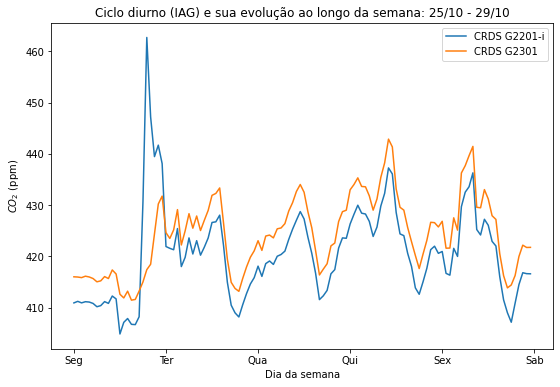

In [51]:
 # Plot comparativo do ciclo diurno medido pelos 2 equipamentos ao longo da semana

 ax = plt.figure(figsize=(9,6))
 ax = sns.lineplot(
     data=df_isotopico,
     x=df_isotopico.index,
     y='CO2_dry',
     label='CRDS G2201-i'
 )

 ax = sns.lineplot(
     data=dg_concentracao,
     x=dg_concentracao.index,
     y='CO2_dry',
     label='CRDS G2301'
 )

xticks=[0,24,48,72,96,120]
plt.xticks(xticks)
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex','Sab'])
plt.ylabel('$CO_2$ (ppm)')
plt.xlabel('Dia da semana')
plt.title('Ciclo diurno (IAG) e sua evolução ao longo da semana (25/10 - 29/10)') # O horários dos dados é UTC 
plt.show()

- Os valores de aproximadamente 460 ppm o observados na segunda-feira para o CRDS isotópico foi consequência do efeito de vazamento no filtro de passagem da amostra de ar (detectado no momento em que os membros presentes do projeto entraram na sala de equipamentos para efetuar ajustes).

- É possível observar um "shift", isto é, uma defasagem de concentração entre as medidas do CRDS padrão e as medidas do CRDS isotópico (apesar do perfil de variação do $CO_2$ ser o mesmo). Isso ocorre porque o CRDS padrão mede todos os tipos de isótopos de CO2 (os quais também contribuem para a concentração total), enquanto o outro equipamento se restringe aos isótopos $^{12}CO_2$

## Observações dos dados da 2ª feira (25/10)

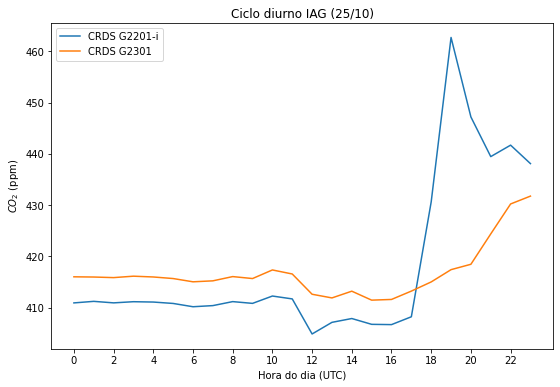

In [54]:
ax = plt.figure(figsize=(9,6))
ax = sns.lineplot(
    data=df_25,
    x=df_25.index.hour,
    y='CO2_dry',
    label='CRDS G2201-i'
)

ax = sns.lineplot(
    data=dg_25,
    x=dg_25.index.hour,
    y='CO2_dry',
    label='CRDS G2301'
)

xticks = [0,2,4,6,8,10,12,14,16,18,20,22]
plt.xticks(xticks)
plt.title('Ciclo diurno IAG (25/10)')
plt.ylabel('$CO_2$ (ppm)')
plt.xlabel('Hora do dia (UTC)')
plt.show()

- Assim como discutido no tópico anterior, a defasagem entre os dois equipamentos é mantida. As concentrações de $CO_2$ começam a se elevar abruptamente no horário $\approx 17h$ , que foi justamente o horário em que os membros entraram na sala para iniciar as tarefas.

- Observa-se uma elevação (pouco intensa, mas gradual) das concentrações de $CO_2$ no CRDS G2301 no período das $20h$ $\sim$ $21h$ $\textrm{UTC}$. Uma vez que esse período representa as $17h$ $\sim$ $18h$ no horário local, acredita-se que esse aumento das concentrações seja consequência do aumento do fluxo de carros nas proximidades do IAG  (início do horário de pico). 



In [57]:
# Tabelas descritivas

print(df_25.describe()) # Descrição das medidas efetuadas pelo isotópico
print('-'*20)
print(dg_25.describe()) # Descrição das medidas efetuadas pelo CRDS padrão

          CO2_dry
count   24.000000
mean   418.100655
std     15.823075
min    404.883427
25%    409.705565
50%    411.029784
75%    416.875866
max    462.708441
--------------------
          CO2_dry
count   24.000000
mean   416.800925
std      5.118123
min    411.480659
25%    414.587198
50%    415.932008
75%    416.778688
max    431.770643
